# Introduction

In this notebook, we use Amazon Textract and Google Vision to provide a quick way of extracting text/tables from an image of a page.

Intended use: The intended use of this notebook is to quickly prototype. You should expect to modify the code in this notebook to suit your usecase.

Preparation: At a minimum, set a working folder, and make sure to add your API keys for both Textract and Google Vision. To do so, please follow the steps outlined here: https://github.com/MikeJGiordano/OCR_History/blob/main/ReadMe.md

This notebook contains four parts:

    1. Unmodified image OCR. This is intended to quickly detect text from a single image.
        a. There is then an option to run one or both OCR tools on a whole folder.
        
    2. Image preprocessing. This routine helps you to quickly preprocess a single image (adjust contrast, split image, etc). 
        a. If you are satisfied with the preprocessing routine, it will give you the option to preprocess a whole folder.
        
    3. Image preprocessing with text extraction. This runs the image modification from part 2 into the text detection from part 1.
    
    4. Image preprocessing with table extraction from Textract. This uses the image modification from part 2 to extract a table using Textract.

# Program Setup

## There are 5 steps, marked A-E.

### A: Import packages

In [1]:
import io
import json
import os

# if you don't have these packages use any package manager to install
# you can install all packages at once using the provided requirements.txt file
import cv2
import boto3
from google.cloud import vision

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm as tq

from PIL import Image, ImageDraw
from textractor import Textractor
from textractor.visualizers.entitylist import EntityList
from textractor.data.constants import TextractFeatures, Direction, DirectionalFinderType

# note: the following py file, you'll have to download
import preprocess as pp

### B: Please set your working directories here

In [2]:
# please set the path to the folder containing your images here
input_folder = "images"  # relative path since we're already in the correct directory
# please set the path to a desired output folder here
output_folder = "output"

### C: Please set your main input file here

In [3]:
# set the filename to your image here
newspaper_image = "NYT.png"

### D: Please authenticate Google Cloud

For help with Google Cloud, see https://github.com/MikeJGiordano/OCR_History/blob/main/Setup_Google_Cloud.md

In [4]:
#Authenticate Google Cloud here

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/mnt/c/Users/WATLINGS/Documents/GitHub/OCR_History/OCR_Python/ServiceAccountToken.json'
client = vision.ImageAnnotatorClient()

### E: Please authenticate Amazon Textract

For help with Amazon Textract, see https://github.com/MikeJGiordano/OCR_History/blob/main/Setup_AWS_Root.md

In [5]:
#Authenticate AWS Textract in the console/terminal

# Part 1: Basic text extraction

In [6]:
# plot the image, save .json outputs
pp.process_content(newspaper_image, 
                   input_folder,
                   output_folder,
                   show_image=True,
                   use_google_vision=True, 
                   use_textract=True, 
                   verbose=True) 

Google Vision Output:
Error with Cloud Vision
Setting all parameters=True gives a basic visualization of the outputs of both Cloud Vision, defaulted as the first image, and Textract, the second image. The .txt and .json outputs for both Cloud Vision and Textract are saved in the output_folder. By setting a parameter=False, you can skip that function. For example, if use_textract=False and use_google_vision=True, this will not send the image through Textract, but will send the image through Google Vision.


### You can use the next cell to get text and JSON files for the entire input folder through Google Vision, Textract, or both.

In [7]:
# Batch process all images in the input folder, save text and JSON outputs to the output folder

pp.batch_ocr(input_folder, 
                 output_folder, 
                 use_google_vision=True, 
                 use_textract=True)

Processing Images: 100%|█████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1836.65image/s]

All images OCR'd. text and JSON files are in folder output


# Part 2: Preprocess images
Often, it helps to preprocess an image. Common routines are:
    
    1. Adjusting contrast or brightness
    2. Converting to grayscale
    3. Cropping
    4. Erasing margins
    5. Splitting images
    
We now provide two examples:
    
    1. Applying points 1-4 
    2. Preprocessing and splitting the image

### Example 1: Full image

In [8]:
# set the filename to your image here
railroad_table = "1888_Page_161.png"

In [9]:
#The next cell will apply the default preprocess settings to your image.
#If you are unsatisfied with those settings, it will instruct you on how to make changes.
#Those changes should be inserted in this cell.



Do you want to split this image into two separate images? (y/n): y
Do you want to split it Vertically or Horizontally? (v/h) v


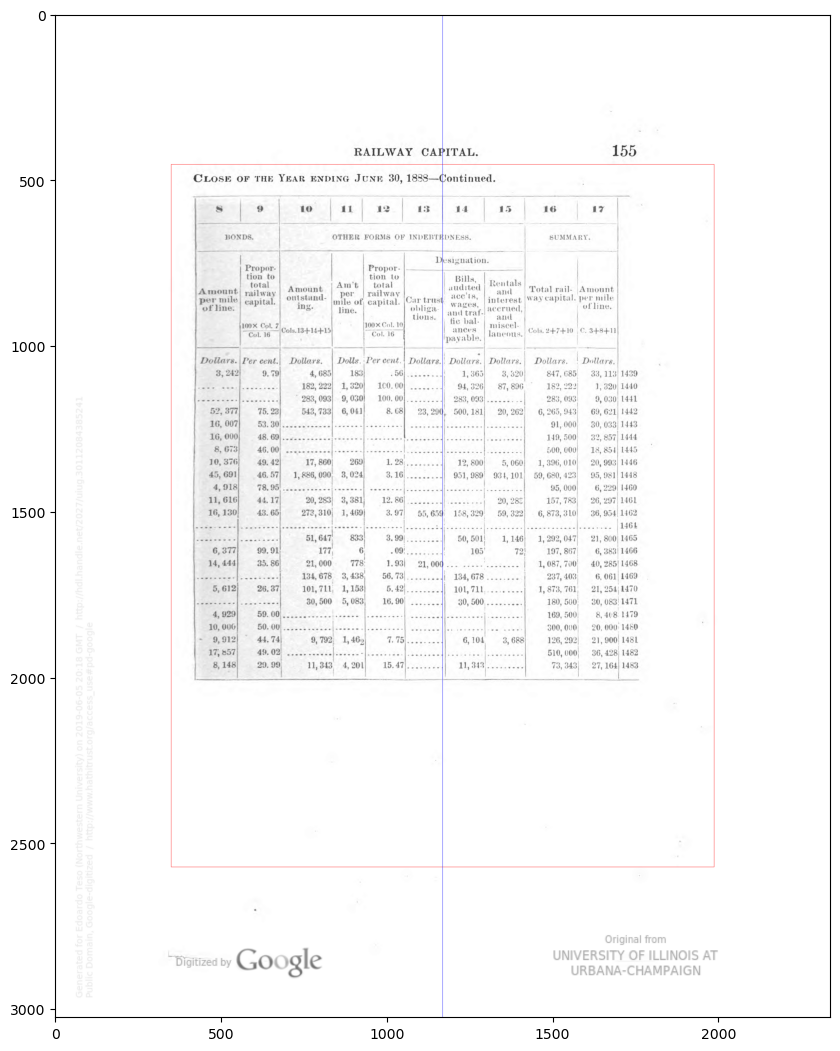

Are you satisfied with the outline you see? (y/n):  y


Here is an output based on these parameters


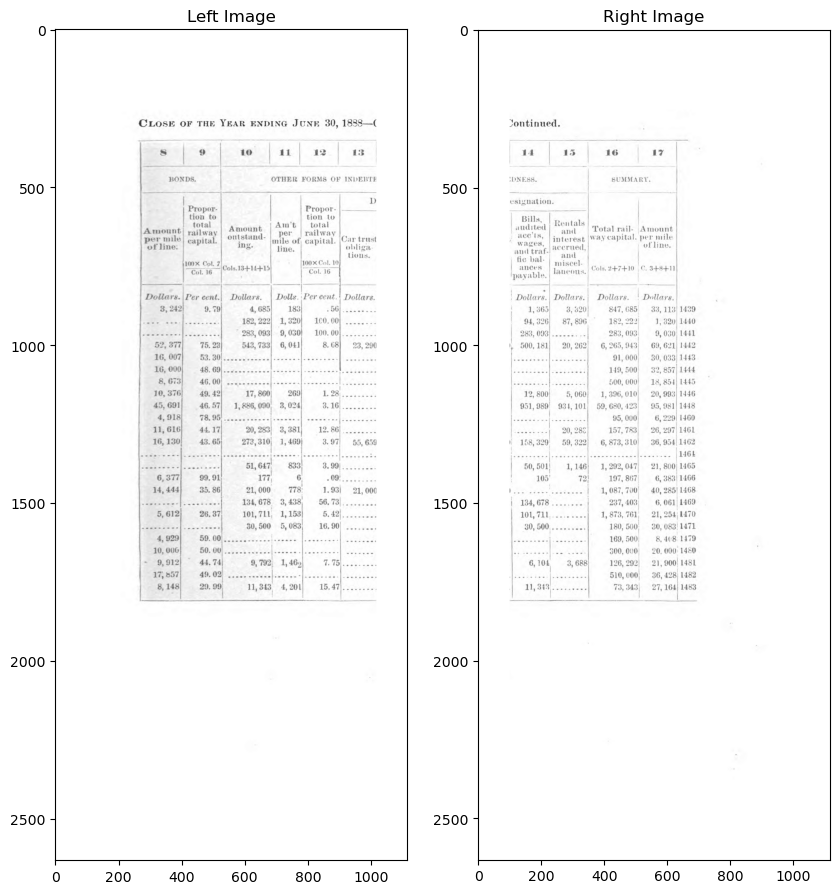

Preprocessed images are saved in a subfolder of your output folder called 'modified_images'.


Do you want to batch run this preprocessing routine on the entire input folder? (y/n):  y


Processing Images: 100%|███████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.08s/image]


In [10]:
#Preprocess a single image.
pp.preprocess_image(railroad_table,
                       input_folder,
                       output_folder,
                       **pp.default);

### Example 2: Split image

In [11]:
# set the filename to your split image here
korean_image = "126.png"

In [12]:
#The next cell will apply the default preprocess settings to your image.
#If you are unsatisfied with those settings, it will provide instructions on how to make changes.

pp.default['left_margin_percent'] = 30
pp.default['top_margin_percent'] = 5

Do you want to split this image into two separate images? (y/n): y
Do you want to split it Vertically or Horizontally? (v/h) v


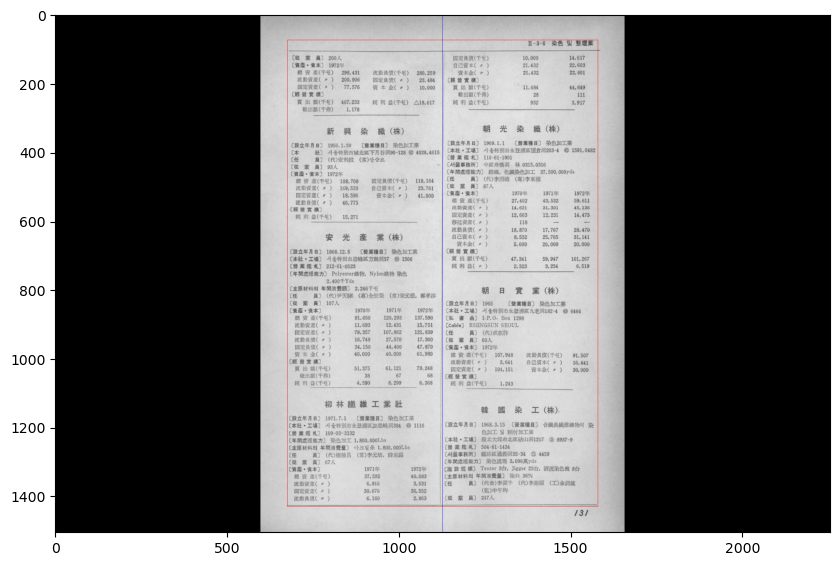

Are you satisfied with the outline you see? (y/n):  y


Here is an output based on these parameters


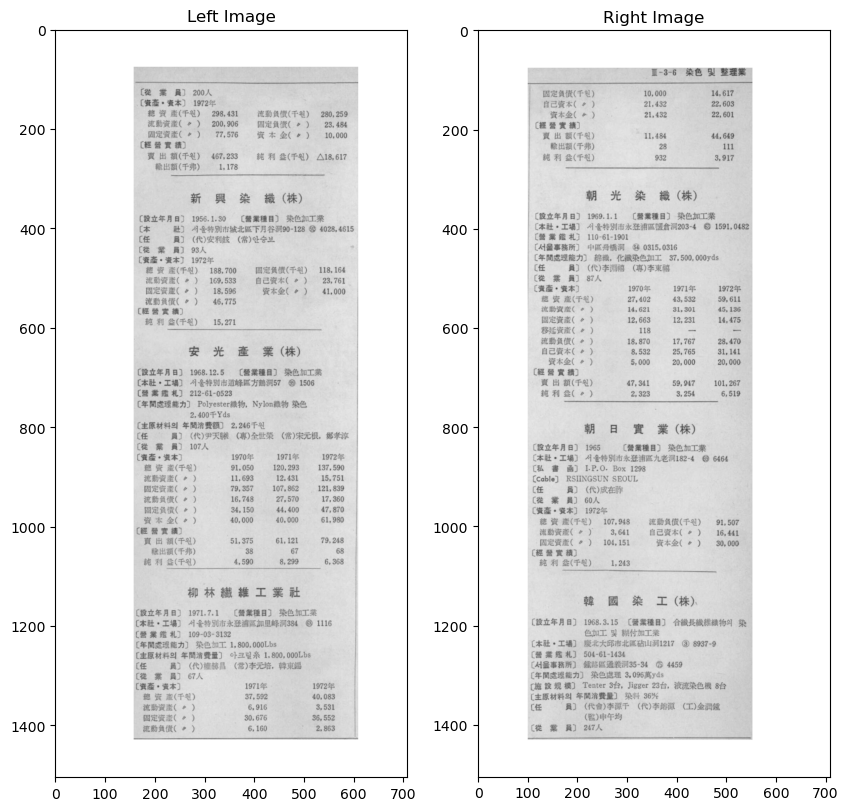

Preprocessed images are saved in a subfolder of your output folder called 'modified_images'.


Do you want to batch run this preprocessing routine on the entire input folder? (y/n):  n


In [13]:
#Preprocess a split image.
pp.preprocess_image(korean_image,
                       input_folder,
                       output_folder,
                       **pp.default);

# Part 3: Preprocessed Text Extraction

### Example 1: Full image

In [14]:
# using the above processing, the folder of modified images is located at:

modified_images = "output/modified_images/"

# Modification alters the name of the file to be:

modified_railroad = 'modified_' + railroad_table

Running through Textract since use_textract=True
Textract Output:


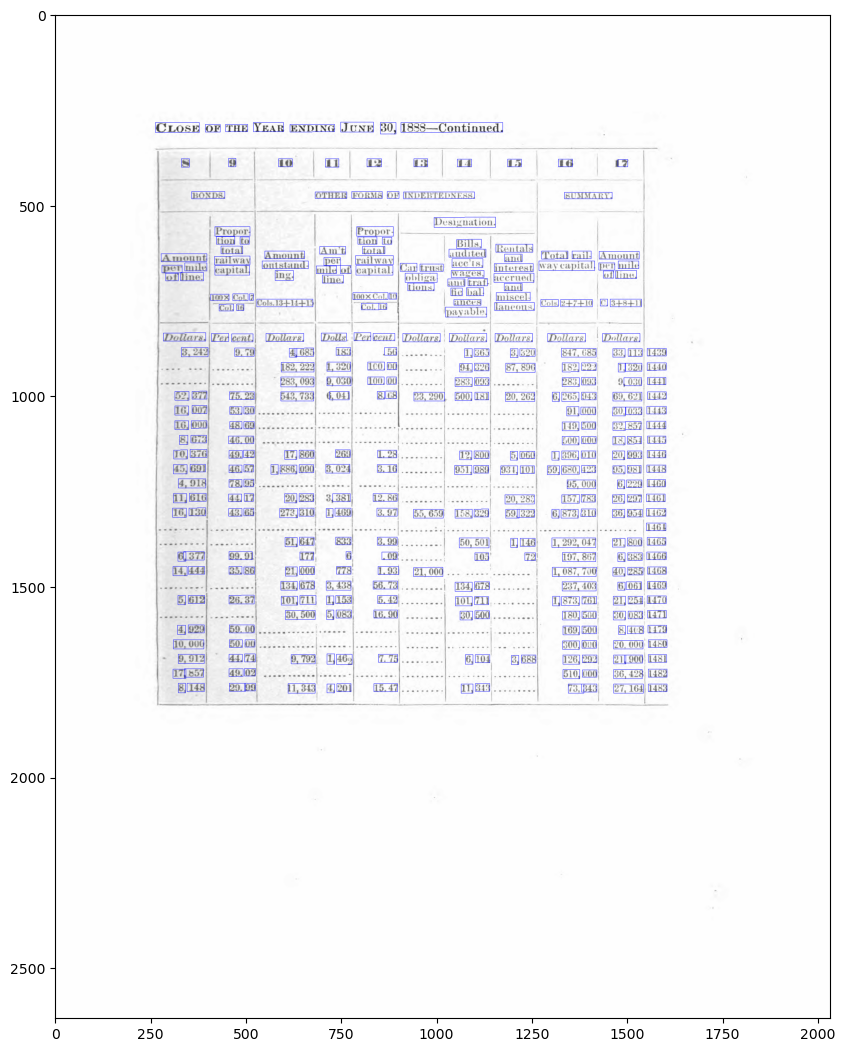

Setting all parameters=True gives a basic visualization of the outputs of both Cloud Vision, defaulted as the first image, and Textract, the second image. The .txt and .json outputs for both Cloud Vision and Textract are saved in the output_folder. By setting a parameter=False, you can skip that function. For example, if use_textract=False and use_google_vision=True, this will not send the image through Textract, but will send the image through Google Vision.


In [15]:
# plot the image, save .json outputs
pp.process_content(modified_railroad, 
                   modified_images,
                   output_folder,
                   show_image = True,
                   use_google_vision=False, 
                   use_textract=True, 
                   verbose=True)

### Example 2: Split image

In [16]:
# Modification splits the file into two and renames them:

modified_1_split = 'modified_1_' + korean_image
modified_2_split = 'modified_2_' + korean_image

In [17]:
# plot the images, save .json and .txt outputs
pp.process_content(modified_1_split, 
                   modified_images,
                   output_folder,
                   show_image = True,
                   use_google_vision=True, 
                   use_textract=False, 
                   verbose=True)

pp.process_content(modified_2_split, 
                   modified_images,
                   output_folder,
                   show_image = False,
                   use_google_vision=False, 
                   use_textract=False, 
                   verbose=False)

Google Vision Output:
Error with Cloud Vision
Setting all parameters=True gives a basic visualization of the outputs of both Cloud Vision, defaulted as the first image, and Textract, the second image. The .txt and .json outputs for both Cloud Vision and Textract are saved in the output_folder. By setting a parameter=False, you can skip that function. For example, if use_textract=False and use_google_vision=True, this will not send the image through Textract, but will send the image through Google Vision.


### You can use the next cell to get text and JSON files for the entire folder of modified images through Google Vision, Textract, or both.

In [18]:
# Batch process all images in the modified folder, save .json outputs to the output folder

pp.batch_ocr(modified_images, 
                 output_folder, 
                 use_google_vision=False, 
                 use_textract=False)

Processing Images: 100%|████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 94846.07image/s]

All images OCR'd. text and JSON files are in folder output


# Part 4: Textract Table Extraction

### Setup

Initialize Textractor client, modify region if required

In [19]:
extractor = Textractor(profile_name="default")

Please specify the image you want to extract a table from.

In [20]:
# using the above processing, the folder of modified images is located at:

modified_images = "output/modified_images/"

# Modification alters the name of the file to be:

modified_railroad = 'modified_' + railroad_table

## Extract the tables

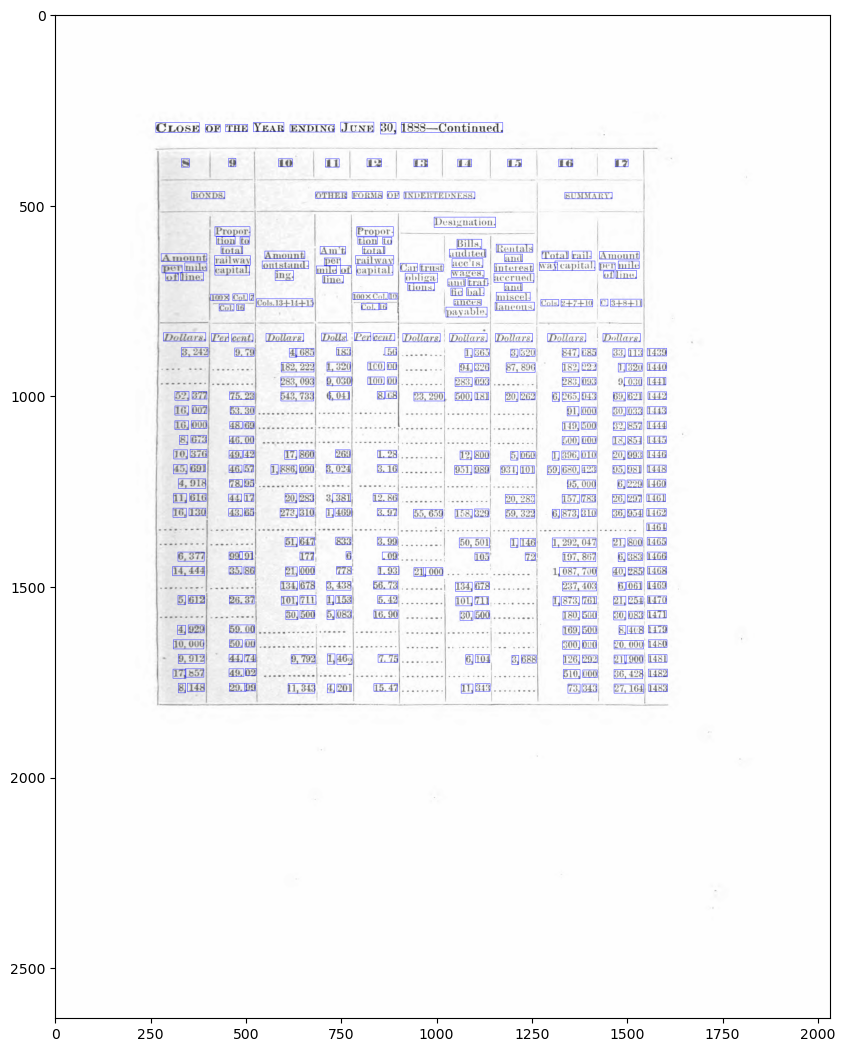

Do you want to see the table output? (y/n):  y


,0,1,2,3,4,5,6,7,8,9,10
0,S,9,10,11,12,13,14,15,16,17,
1,BONDS.,,OTHER FORMS OF INDEBTEDNESS,,,,,,SUMMARY.,,
2,Amount per mile of line.,Propor- tion to total railway capital. 100x Co...,Amount outstand- ing. Cols.13-14-15,Am't per mile of line.,Propor- tion to total railway capital. 100x Co...,Designation.,,,Total rail- way capital. Cols. 2+7+10,Amount per mile of line. C. 3+8+11,
3,,,,,,Car trust obliga- tions.,"Bills, audited acc'ts, wages, and traf fic bal...","Rentals and interest accrued, and miscel- lane...",,,
4,Dollars.,Per cent.,Dollars.,Dolls,Per cent.,Dollars.,Dollars.,Dollars.,Dollars.,Dollars.,
5,"3,242",9.79,"4, 685",183,56,,"1, 365","3, 320","847, 685","33, 113",1439
6,,,"182,222","1,320",100. 00,,"94, 326","87,896","182, 222","1, 320",1440
7,,,"283,093","9,030",100. 00,,"283, 093",,"283, 093",030,1441
8,"52, 377",75.23,"543,733","6,041",8. 68,"23,290","500, 181","20, 262","6, 265, 943","69, 621",1442
9,"16, 007",53.30,,,,,,,"91, 000","30, 033",1443


Do you want to batch extract the Excel tables from images in the input_folder? (y/n):  y


The .xlsx output files will be saved in your output_folder


Processing Images:  44%|████████████████████████████                                   | 4/9 [00:13<00:15,  3.18s/image]

Error processing modified_1_NYT.png: An error occurred (InvalidParameterException) when calling the AnalyzeDocument operation: Request has invalid parameters


Processing Images:  67%|██████████████████████████████████████████                     | 6/9 [00:19<00:09,  3.08s/image]

Error processing modified_2_NYT.png: An error occurred (InvalidParameterException) when calling the AnalyzeDocument operation: Request has invalid parameters


Processing Images:  67%|██████████████████████████████████████████                     | 6/9 [00:27<00:13,  4.66s/image]

Error processing modified_NYT.png: An error occurred (InvalidParameterException) when calling the AnalyzeDocument operation: Request has invalid parameters


In [21]:
pp.extract_table(extractor, 
                       modified_railroad,
                       modified_images,
                       output_folder);